In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/SET9_data.csv',
    sep=',',
    decimal=',',
    encoding='windows-1251'
)

Index(['Алгоритм', 'Размер', 'ТипДанных', 'Время(мс)', 'Кол-воСравнений'], dtype='object')
      Алгоритм  Размер  ТипДанных  Время(мс)  Кол-воСравнений
0    quicksort     100          0     0.1430              859
1    mergesort     100          0     0.1562              547
2  t_quicksort     100          0     0.0268                0
3    msd_radix     100          0     0.3776                0
4   msd_hybrid     100          0     0.1656                0


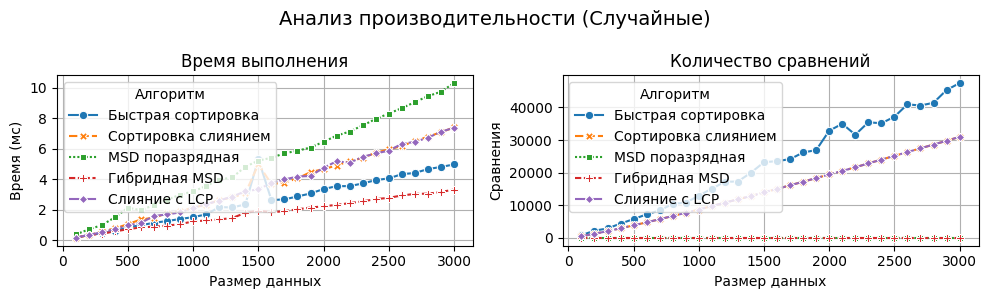

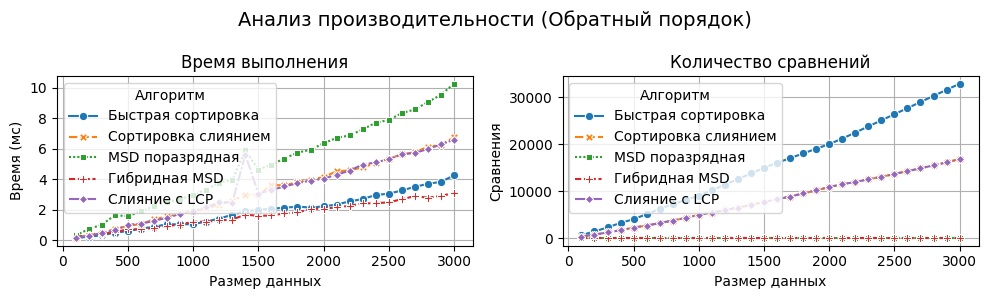

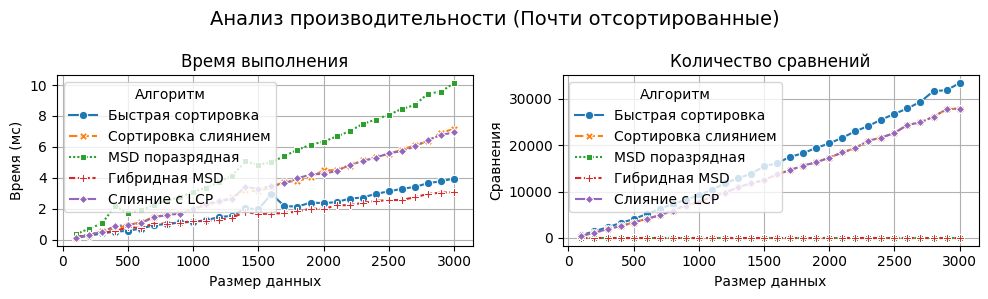

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


algorithm_translation = {
    'quicksort': 'Быстрая сортировка',
    'mergesort': 'Сортировка слиянием',
    'ternary_quicksort': 'Тернарная быстрая',
    'msd_radix': 'MSD поразрядная',
    'msd_hybrid': 'Гибридная MSD',
    'lcp_mergesort': 'Слияние с LCP'
}

data_type_translation = {
    0: 'Случайные',
    1: 'Обратный порядок',
    2: 'Почти отсортированные'
}

print(df.columns)
print(df.head())
df['Алгоритм'] = df['Алгоритм'].map(algorithm_translation)
df['ТипДанных'] = df['ТипДанных'].map(data_type_translation)


for data_type in df['ТипДанных'].unique():
    subset = df[df['ТипДанных'] == data_type]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    plt.suptitle(f'Анализ производительности ({data_type})', fontsize=14)

    # График времени выполнения
    sns.lineplot(
        data=subset,
        x='Размер',
        y='Время(мс)',
        hue='Алгоритм',
        style='Алгоритм',
        markers=True,
        ax=ax1
    )
    ax1.set_title('Время выполнения')
    ax1.set_xlabel('Размер данных')
    ax1.set_ylabel('Время (мс)')
    ax1.grid(True)

    # График количества сравнений
    sns.lineplot(
        data=subset,
        x='Размер',
        y='Кол-воСравнений',
        hue='Алгоритм',
        style='Алгоритм',
        markers=True,
        ax=ax2
    )
    ax2.set_title('Количество сравнений')
    ax2.set_xlabel('Размер данных')
    ax2.set_ylabel('Сравнения')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()